In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pat = pd.ExcelFile('HospitalDatabase.xlsx')
ed_visits = pd.read_excel(pat, 'EDVisits')
amb_visits = pd.read_excel(pat, 'AmbulatoryVisits')
re_adm=pd.read_excel(pat, 'ReAdmissionRegistry')
dis=pd.read_excel(pat, 'Discharges')
pro=pd.read_excel(pat, 'Providers')
edu = pd.read_excel(pat, 'EDUnique')

# 61:Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [3]:
hypertension_count = amb_visits.loc[(amb_visits['BloodPressureSystolic'] > 180) & (amb_visits['BloodPressureDiastolic'] > 120), 'PatientMRN'].nunique()

print("Count of patients prone to hypertension crisis:", hypertension_count)

Count of patients prone to hypertension crisis: 87


# 62:Which patient id has most entries in readmission registry.

In [4]:
most_common_patient_id = re_adm['PatientID'].value_counts().idxmax()
most_common_patient_entries = re_adm['PatientID'].value_counts().max()

print(f"Patient ID: {most_common_patient_id} has the most entries in the readmission registry with {most_common_patient_entries} entries")


Patient ID: 23 has the most entries in the readmission registry with 3 entries


# 63:If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [5]:
# 'Patients' is the sheet name containing the data
sheet_name = 'Patients'

# Parse the sheet data into a DataFrame
pat_df = pat.parse(sheet_name)

In [6]:
def add_title(first_name, last_name, gender):
    full_name = f"{first_name} {last_name}"
    if gender == 'Female':
        return 'Ms. ' + full_name
    elif gender == 'Male':
        return 'Mr. ' + full_name
    else:
        return full_name

# Apply the function to create the ModifiedName column
pat_df['ModifiedName'] = pat_df.apply(lambda row: add_title(row['FirstName'], row['LastName'], row['Gender']), axis=1)

pat_df['ModifiedName']

0             Mr. Lanni Sue
1             Mr. Far Myers
2       Mr. Devlin  Michael
3         Mr. Carmine Texas
4            Mr. Tann  Bama
               ...         
940         Mr. Wat Fideler
941     Mr. Wandie Baythrop
942     Mr. Diahann Smeeton
943    Mr. Panchito Sharple
944        Mr. Walsh Calvie
Name: ModifiedName, Length: 945, dtype: object

# 64:Plot a graph by counting the no. of patients in each department.

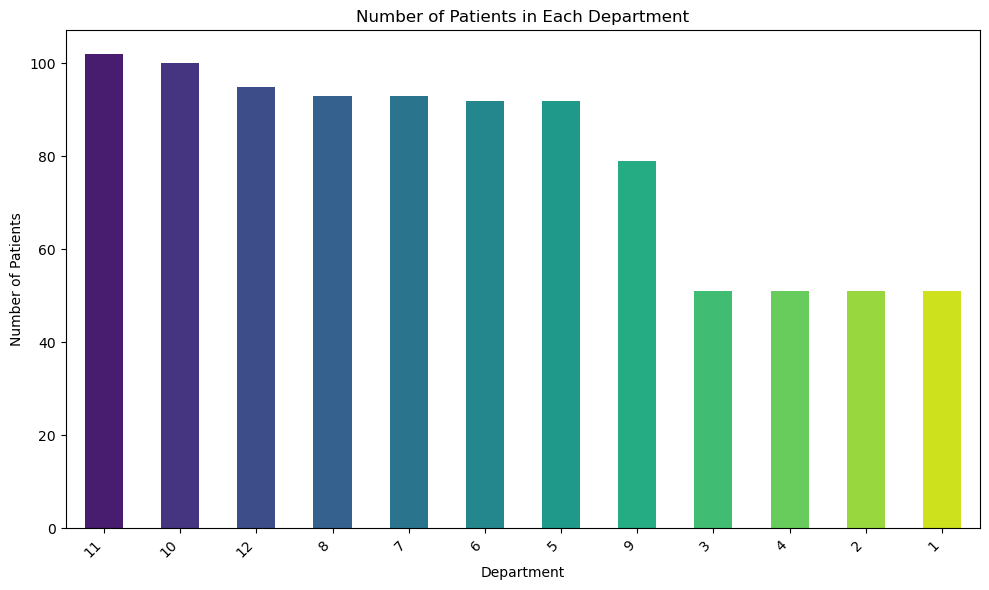

In [47]:
sheet_name = 'AmbulatoryVisits'

amb_visits_df = pat.parse(sheet_name)

# Count of the number of patients in each department
department_counts = amb_visits_df['VisitDepartmentID'].value_counts()

sequential_palette = sns.color_palette("virdis", n_colors=len(department_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color=sequential_palette)
plt.title('Number of Patients in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# 65:Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.  

In [51]:
sheet_name = 'AmbulatoryVisits'

amb_visits_df = pat.parse(sheet_name)

# Create bins and labels for different levels of hypertension
bins = [0, 120, 129, 139, 180]
labels= ['Mild Hypertension', 'Moderate', 'High Hypertension', 'Severe Hypertension']
# Create a new column 'HypertensionLevel' based on readings
amb_visits_df['HypertensionLevel'] = pd.cut(amb_visits_df['BloodPressureSystolic'], bins=bins, labels=labels, right=False)

print(amb_visits_df[['PatientMRN', 'HypertensionLevel']])

     PatientMRN    HypertensionLevel
0           840                  NaN
1           820  Severe Hypertension
2           879    High Hypertension
3           884    High Hypertension
4            32    High Hypertension
..          ...                  ...
945         873                  NaN
946         855                  NaN
947         865  Severe Hypertension
948         635  Severe Hypertension
949         847  Severe Hypertension

[950 rows x 2 columns]


# 66:Plot a graph showing the count of patients for the reason visited the hospital.

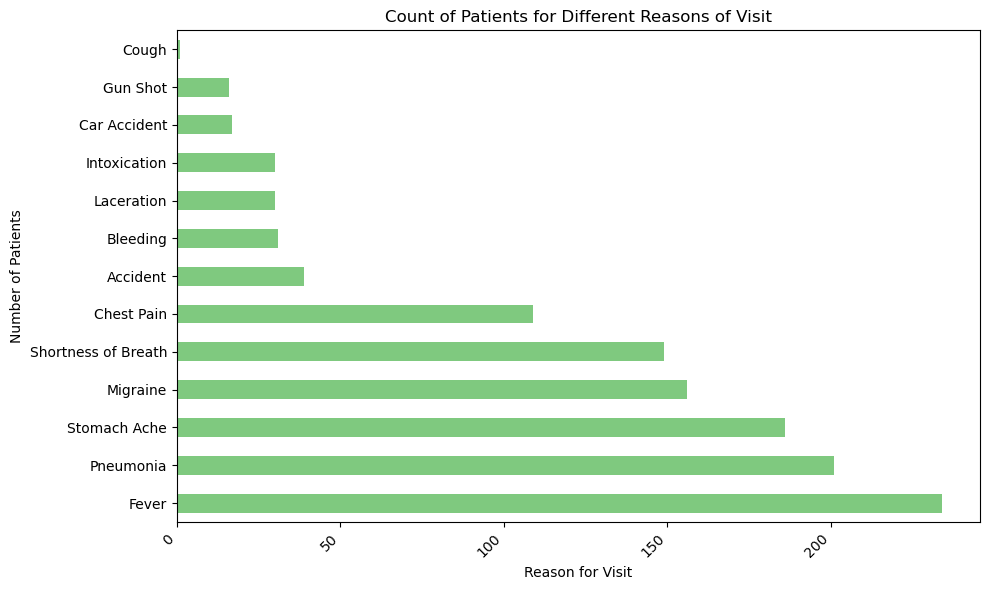

In [121]:
sheet_name = 'EDVisits'

amb_visits_df = pat.parse(sheet_name)

#  Count the number of patients by reason for visit
reason_counts = amb_visits_df['ReasonForVisit'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='barh', colormap='Accent')
plt.title('Count of Patients for Different Reasons of Visit')
plt.xlabel('Reason for Visit')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# 67:Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

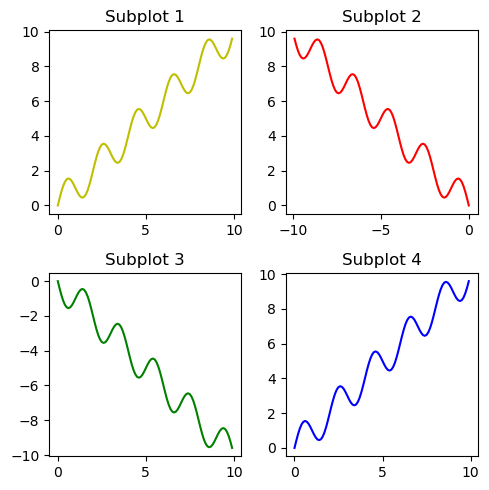

In [124]:
# Create x,y
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2,figsize=(5, 5))

# First subplot
axs[0, 0].plot(x, y,'y')
axs[0, 0].set_title('Subplot 1')

# Second subplot
axs[0, 1].plot(-x, y, 'r')
axs[0, 1].set_title('Subplot 2')

# Third subplot
axs[1, 0].plot(x, -y, 'g')
axs[1, 0].set_title('Subplot 3')

# Fourth subplot
axs[1, 1].plot(x, y, 'b')
axs[1, 1].set_title('Subplot 4')

# Adjust layout
plt.tight_layout()

plt.show()


# 68:Make a pivot table by the no. of patients from the admission date till discharge date.

In [69]:
# Assuming 'Discharges' is the sheet name containing the data
sheet_name = 'Discharges'

# Parse the sheet data into a DataFrame
discharges_df = pat.parse(sheet_name)

# Convert date columns to datetime
discharges_df['AdmissionDate'] = pd.to_datetime(discharges_df['AdmissionDate'])
discharges_df['DischargeDate'] = pd.to_datetime(discharges_df['DischargeDate'])

# Create a new DataFrame with date range
date_range = pd.date_range(start=discharges_df['AdmissionDate'].min(), end=discharges_df['DischargeDate'].max())
date_range_df = pd.DataFrame({'Date': date_range})

# Merge the date range DataFrame with the discharges_df DataFrame
merged_data = pd.merge(date_range_df, discharges_df, how='left', left_on='Date', right_on='AdmissionDate')

# Pivot table to count the number of patients for each date
pivot_table = merged_data.pivot_table(index='Date', values='AdmissionDate', aggfunc='count', fill_value=0)

# Print the pivot table
print(pivot_table)


            AdmissionDate
Date                     
2018-01-01             18
2018-01-02             18
2018-01-03             18
2018-01-04             18
2018-01-05             14
...                   ...
2018-03-06              0
2018-03-07              0
2018-03-08              0
2018-03-09              0
2018-03-10              0

[69 rows x 1 columns]


# 69:Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [70]:
# Assuming 'Discharges' is the sheet name containing the data
sheet_name = 'Discharges'

# Parse the sheet data into a DataFrame
discharges_df = pat.parse(sheet_name)

# Convert date columns to datetime
discharges_df['AdmissionDate'] = pd.to_datetime(discharges_df['AdmissionDate'])
discharges_df['DischargeDate'] = pd.to_datetime(discharges_df['DischargeDate'])

# Calculate Length of Stay (LOS) in days
discharges_df['LOS'] = (discharges_df['DischargeDate'] - discharges_df['AdmissionDate']).dt.days

# Create a pivot table for average LOS based on Service and Primary Diagnosis
pivot_table = discharges_df.pivot_table(index=['Service', 'PrimaryDiagnosis'], values='LOS', aggfunc='mean')

# Print the pivot table
print(pivot_table)


                                           LOS
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.250000
                 Afib                11.200000
                 Broken Leg          10.666667
                 Flu                 12.000000
                 Heart Failure        9.512821
                 Kidney Failure       4.000000
General Medicine Broken Leg          13.000000
                 Diabetes            10.289474
                 Fever                8.000000
                 Flu                  9.888889
                 Hypertension         8.914286
                 Kidney Failure      10.666667
                 Laceration           9.428571
                 Pneumonia            9.417910
                 Stroke              11.250000
Hospitalist      AMI                 10.000000
                 Broken Leg           7.666667
                 Diabetes             8.846154
                 Fever               10.666667
             

# 70:Create a visualization on the count of patients based on primary diagnosis.

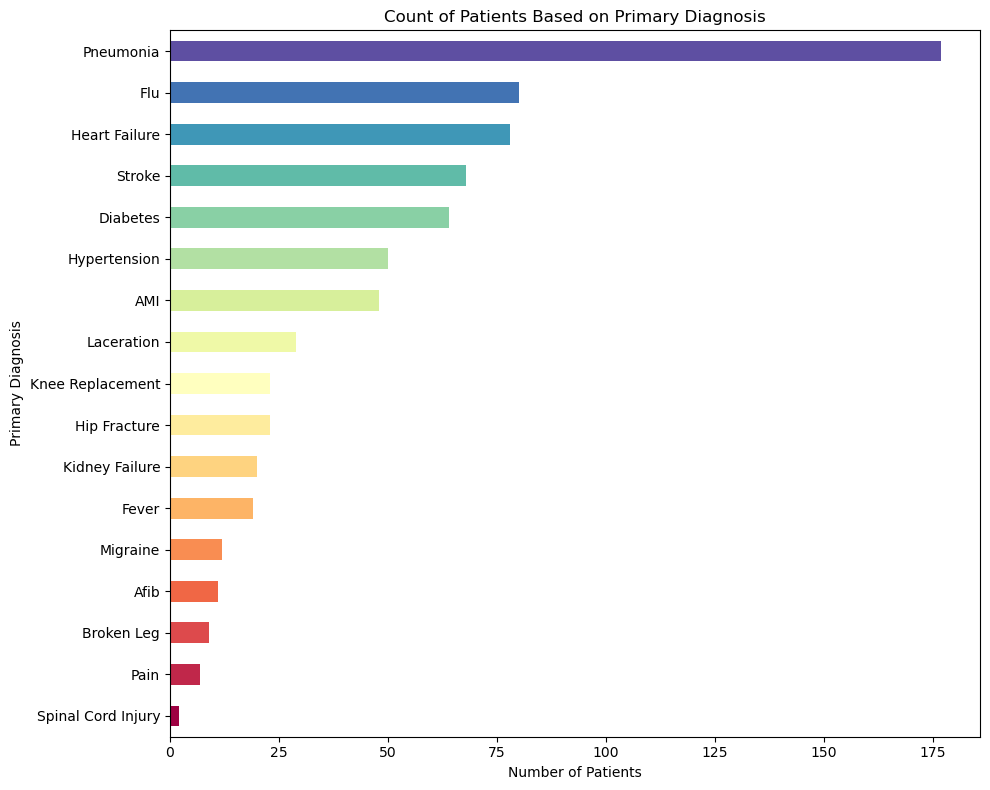

In [83]:
# Assuming 'Discharges' is the sheet name containing the data
sheet_name = 'Discharges'

# Parse the sheet data into a DataFrame
discharges_df = pat.parse(sheet_name)

# Calculate the count of patients based on Primary Diagnosis
diagnosis_counts = discharges_df['PrimaryDiagnosis'].value_counts()

# Sort the diagnosis_counts in descending order
diagnosis_counts = diagnosis_counts.sort_values(ascending=True)

# Create a colormap
cmap = cm.get_cmap('Spectral', len(diagnosis_counts))

# Create a horizontal bar plot with cubehelix colormap
plt.figure(figsize=(10, 8))
diagnosis_counts.plot(kind='barh', color=[cmap(i) for i in range(len(diagnosis_counts))])
plt.title('Count of Patients Based on Primary Diagnosis')
plt.xlabel('Number of Patients')
plt.ylabel('Primary Diagnosis')
plt.tight_layout()

# Show the plot
plt.show()


71:Create a dataframe by splitting provider name to firstname and lastname with names for the columns.